In [1]:
# Primero cargamos toda la data

import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

In [2]:
# verificar el CRS, en este caso no debemos realizar cambios ya que todos tienen el mismo

countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [3]:
rivers.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
# Elegimos un país con el que trabajaremos, en este caso Ucrania

ukraine=countries[countries.COUNTRY=='Ukraine']

<Axes: >

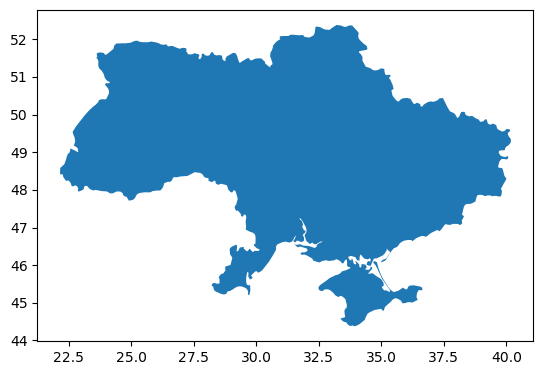

In [6]:
# Mostramos los mapas independientemente del país:

ukraine.plot()

<Axes: >

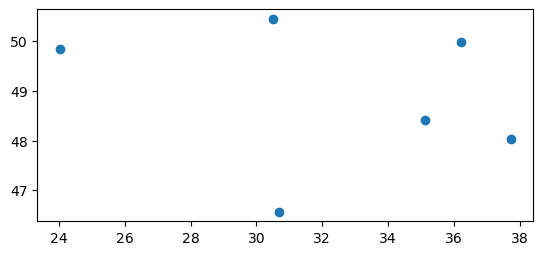

In [7]:
cities_ukraine=cities[cities.COUNTRY=='Ukraine']
cities_ukraine.plot()


<Axes: >

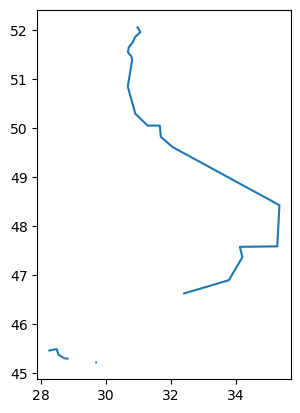

In [8]:
rivers_ukraine = gpd.clip(gdf=rivers,
                               mask=ukraine)

rivers_ukraine.plot()

<Axes: >

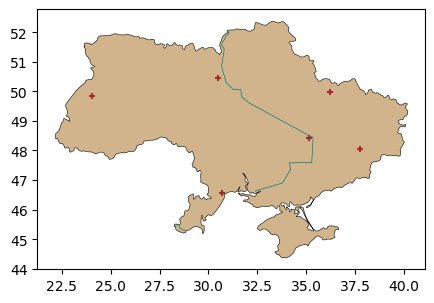

In [9]:
# Mostramos la información del mapa filtrado por el país con el que estamos trabajando:

base = ukraine.plot(facecolor="tan", edgecolor='black', linewidth=0.4,figsize=(5,5))
cities_ukraine.plot(marker='+', color='brown', markersize=15,ax=base)
rivers_ukraine.plot(edgecolor='teal', linewidth=0.5,ax=base)

In [10]:
# Realizamos el mapa interactivo:

ukraineCoords=[48.379433, 31.16558]

In [11]:
m = cities_ukraine.explore(location=ukraineCoords,
                   zoom_start=4,
                   tiles='CartoDB positron',
                   color='red',
                   name="cities") 
m = rivers_ukraine.explore(m=m, color="blue",
                   name="rivers")

m

In [12]:
ukraine.to_crs(5641).crs.axis_info

[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [13]:
ukraine_5641=ukraine.to_crs(5641)
# just Ukraine

cities_ukraine=cities[cities.COUNTRY=='Ukraine']
cities_5641=cities_ukraine.to_crs(ukraine_5641.crs)

rivers_5641=rivers.to_crs(ukraine_5641.crs)
rivers_5641=gpd.clip(gdf=rivers_5641,mask=ukraine_5641)

<Axes: >

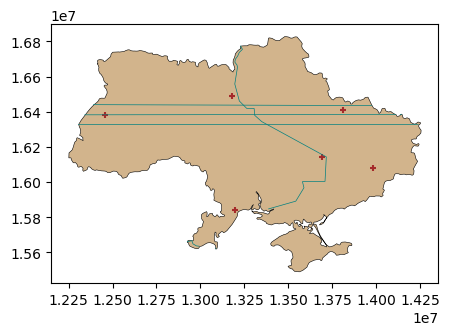

In [14]:
base = ukraine_5641.plot(facecolor="tan", edgecolor='black', linewidth=0.4,figsize=(5,5))
cities_5641.plot(marker='+', color='brown', markersize=15,ax=base)
rivers_5641.plot(edgecolor='teal', linewidth=0.5,ax=base)

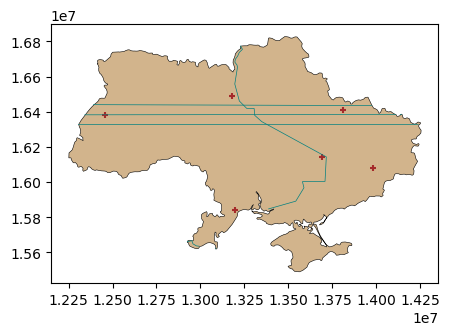

In [15]:
# guardar imágenes

import matplotlib.pyplot as plt

base = ukraine_5641.plot(facecolor="tan", edgecolor='black', linewidth=0.4,figsize=(5,5))
map2=cities_5641.plot(marker='+', color='brown', markersize=15,ax=base)
mapEnd=rivers_5641.plot(edgecolor='teal', linewidth=0.5,ax=base)
plt.savefig(os.path.join("figures",'mapEnd.jpg'))

In [16]:
# en general
countries.to_file(os.path.join("maps","worldMaps.gpkg"), layer='countries', driver="GPKG")
cities.to_file(os.path.join("maps","worldMaps.gpkg"), layer='cities', driver="GPKG")
rivers.to_file(os.path.join("maps","worldMaps.gpkg"), layer='rivers', driver="GPKG")

In [17]:
worldMaps='https://github.com/ZurinaGarcia/simpleplot/raw/main/maps/worldMaps.gpkg'

In [18]:
from  fiona import listlayers

listlayers(worldMaps)

['Ukraine', 'countries', 'cities', 'rivers']

In [19]:
# saving 
import os

ukraine_5641.to_file(os.path.join("maps","ukraine_5641","ukraineMaps_5641.gpkg"), layer='country', driver="GPKG")
cities_5641.to_file(os.path.join("maps","ukraine_5641","ukraineMaps_5641.gpkg"), layer='cities', driver="GPKG")
rivers_5641.to_file(os.path.join("maps","ukraine_5641","ukraineMaps_5641.gpkg"), layer='rivers', driver="GPKG")

In [20]:
############################################################################################################################

In [21]:
import os
import geopandas as gpd
ukraine_5641_path = os.path.join("maps", "ukraine_5641", "ukraineMaps_5641.gpkg")
cities_5641_path = os.path.join("maps", "ukraine_5641", "ukraineMaps_5641.gpkg")
rivers_5641_path = os.path.join("maps", "ukraine_5641", "ukraineMaps_5641.gpkg")


In [22]:
ukraine_5641 = gpd.read_file(ukraine_5641_path, layer='country')
cities_5641 = gpd.read_file(cities_5641_path, layer='cities')
rivers_5641 = gpd.read_file(rivers_5641_path, layer='rivers')


In [23]:
# Define paths to the GeoPackage layers
output_gpkg_path = os.path.join("maps", "ukraine_5641", "reprojected_maps_ukraine.gpkg")

# Save the GeoDataFrames to the GeoPackage
ukraine_5641.to_file(output_gpkg_path, layer='ukraine_5641', driver="GPKG")
cities_ukraine.to_file(output_gpkg_path, layer='cities_ukraine', driver="GPKG")
rivers_ukraine.to_file(output_gpkg_path, layer='rivers_ukraine', driver="GPKG")



In [24]:
geopackage='https://github.com/ZurinaGarcia/simpleplot/raw/main/maps/ukraine_5641/reprojected_maps_ukraine.gpkg'

In [25]:
# Comprobando que funcione

from  fiona import listlayers

listlayers(geopackage)

['ukraine_5641', 'cities_ukraine', 'rivers_ukraine']